In [1]:
from glob import glob
import os

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

import rasterio as rio

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

import plotly.graph_objects as go
# used for plotting
from rasterio.plot import show
import matplotlib.pyplot as plt
from tqdm import tqdm 

import pandas as pd

import geopandas as gpd

# Importing files
Here we are defining images paths, then we are opening and stacking them

In [2]:
# opening sentinel data
root_dir = r"/home/throgg/Documents/Code/python/teledec/"
path_1 = r"/home/throgg/Documents/Code/python/MFE/Browser_images/" # data folder
# Add other paths here
paths = [path_1] # and add them to this list
os.chdir(path_1)

In [3]:
# Opening images
selection_1 = [
    glob("*_B01_(Raw).tiff")[0], # Visible blue
    glob("*_B02_(Raw).tiff")[0], # Visible green
    glob("*_B03_(Raw).tiff")[0], # Visible red
    glob("*_B04_(Raw).tiff")[0], # Near infrared 1
    glob("*_B05_(Raw).tiff")[0], # Near infrared 2
    glob("*_B06_(Raw).tiff")[0], # Thermal
    glob("*_B07_(Raw).tiff")[0], # Mid-infrared
    glob("*_B8A_(Raw).tiff")[0], # Mid-infrared
    glob("*_B08_(Raw).tiff")[0], # Mid-infrared
    glob("*_B09_(Raw).tiff")[0], # Mid-infrared
    # glob("*_B10_(Raw).tiff")[0], # for some reason we do not have band 10
    glob("*_B11_(Raw).tiff")[0], # Mid-infrared
    glob("*_B12_(Raw).tiff")[0], # Mid-infrared
]
# Stack images
α1 = []
for img in selection_1:
    with rio.open(img, 'r') as f:
        α1.append(f.read(1))
image_1 = np.stack(α1)

## Plurima picturas
Hic, multas picturas apertamus. Quinque picturae sunt, ab 2019 ad 2023.

**Here, we open many pictures. There are 5 pictures, from 2019 to 2023**

In [4]:
# Hic vias scribimus
os.chdir(r"/home/throgg/Documents/Code/python/MFE/")
primum_iter = os.path.join(os.getcwd(), "timelapse", "2019", "Browser_images")
secundum_iter = os.path.join(os.getcwd(), "timelapse", "2020", "Browser_images")
tertium_iter = os.path.join(os.getcwd(), "timelapse", "2021", "Browser_images")
quartus_iter = os.path.join(os.getcwd(), "timelapse", "2022", "Browser_images")
quinqus_iter = os.path.join(os.getcwd(), "timelapse", "2023", "Browser_images")
itera = [primum_iter, secundum_iter, tertium_iter, quartus_iter, quinqus_iter]


In [5]:
# TODO ADD THIS TO LOOP
os.chdir(primum_iter)
selection_1 = [
    glob("*_B01_(Raw).tiff")[0], # Visible blue
    glob("*_B02_(Raw).tiff")[0], # Visible green
    glob("*_B03_(Raw).tiff")[0], # Visible red
    glob("*_B04_(Raw).tiff")[0], # Near infrared 1
    glob("*_B05_(Raw).tiff")[0], # Near infrared 2
    glob("*_B06_(Raw).tiff")[0], # Thermal
    glob("*_B07_(Raw).tiff")[0], # Mid-infrared
    glob("*_B8A_(Raw).tiff")[0], # Mid-infrared
    glob("*_B08_(Raw).tiff")[0], # Mid-infrared
    glob("*_B09_(Raw).tiff")[0], # Mid-infrared
    # glob("*_B10_(Raw).tiff")[0], # for some reason we do not have band 10
    glob("*_B11_(Raw).tiff")[0], # Mid-infrared
    glob("*_B12_(Raw).tiff")[0], # Mid-infrared
]
# Stack images
α1 = []
for img in selection_1:
    with rio.open(img, 'r') as f:
        α1.append(f.read(1))
image_1 = np.stack(α1)

## Extracting pixels by mask
Tantum volo pixels sub persona
*Only want the pixels under the mask*

<Axes: title={'center': 'Sentinel 2 RGB Image'}>

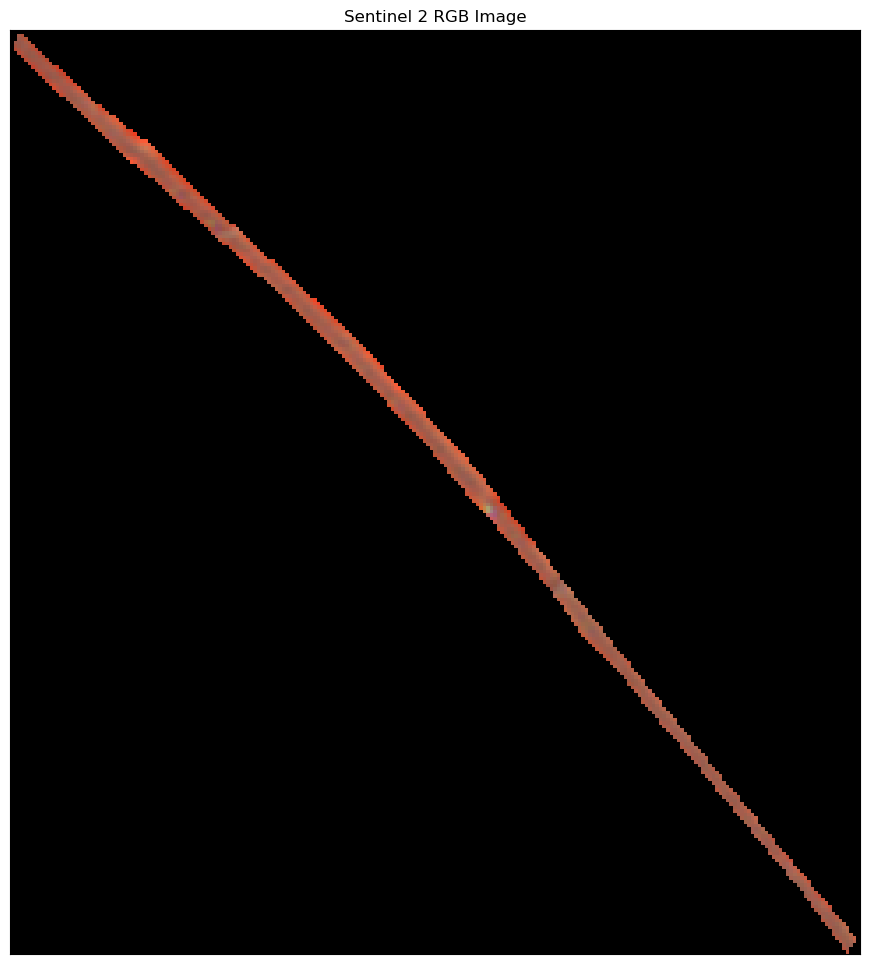

In [6]:
os.chdir(r"/home/throgg/Documents/Code/python/MFE/")
# opening the mask
personae_via = os.path.join("Mask", "mask.shp")
gdf = gpd.read_file(personae_via)

# looping through the images
srcs = []
extents = []
for selection in selection_1:
    src = rio.open(os.path.join("timelapse", "2019", "Browser_images", selection))
    srcs.append(src)
    extents.append([src.bounds[0], src.bounds[2], src.bounds[1], src.bounds[3]])
# Clipping all the bands 1 by 1 and add them to the clipped band list
clipped_bands = []
for num, src in enumerate(srcs): 
    out_image, out_transform = rio.mask.mask(src, gdf.geometry, crop=True)
    clipped_bands.append(np.squeeze(out_image))
# Plotting the result
fig, ax = plt.subplots(figsize=(12, 12))
clipped_stacked = np.stack(clipped_bands, axis=0)
ep.plot_rgb(clipped_stacked, rgb=(5, 2, 1), ax=ax, title="Sentinel 2 RGB Image")

## Plotting bands

|Band|Resolution|Central Wavelength|Description|
|-|-|-|-|
|B1|60 m|443 nm|Ultra Blue (Coastal and Aerosol)|
|B2|10 m|490 nm|Blue|
|B3|10 m|560 nm|Green|
|B4|10 m|665 nm|Red|
|B5|20 m|705 nm|Visible and Near Infrared (VNIR)|
|B6|20 m|740 nm|Visible and Near Infrared (VNIR)|
|B7|20 m|783 nm|Visible and Near Infrared (VNIR)|
|B8|10 m|842 nm|Visible and Near Infrared (VNIR)|
|B8a|20 m|865 nm|Visible and Near Infrared (VNIR)|
|B9|60 m|940 nm|Short Wave Infrared (SWIR)|
|B10|60 m|1375 nm|Short Wave Infrared (SWIR)|
|B11|20 m|1610 nm|Short Wave Infrared (SWIR)|
|B12|20 m|2190 nm|Short Wave Infrared (SWIR)|

## Spectral profile

(12, 262, 241)
[0.0014909996, 0.0021881948, 0.0028583002, 0.0033872954, 0.00412151, 0.005449067, 0.006061531, 0.0066680415, 0.0059469542, 0.008181112, 0.006675793, 0.0045918627]


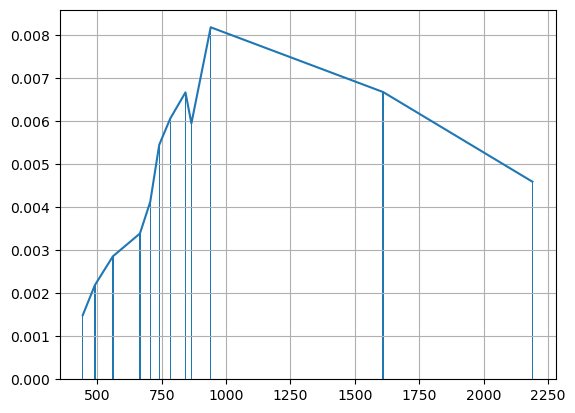

In [150]:
print(clipped_stacked.shape)
wavelengths = [443, 490, 560, 665, 705, 740, 783, 842, 865, 940, 1610, 2190]

pixels = []
for count in range(0, len(wavelengths)): 
    pixels.append(np.mean(clipped_stacked[count, :, :].reshape(clipped_stacked.shape[1] * clipped_stacked.shape[2])))
              
print(pixels)
fig, axs = plt.subplots()
axs.bar(wavelengths, pixels, width=5)
axs.plot(wavelengths, pixels)
axs.grid(True)

# Clipping and spectral analysis of multiple images

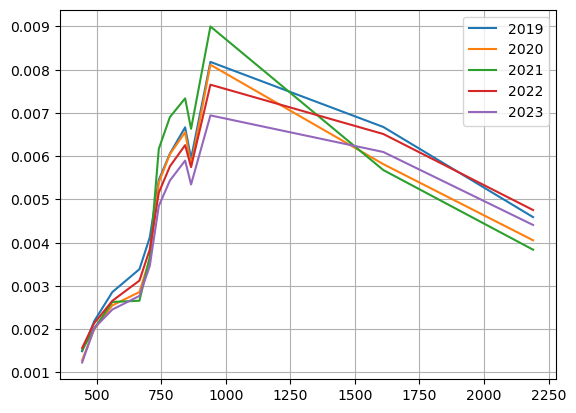

In [191]:
os.chdir(r"/home/throgg/Documents/Code/python/MFE/")
picturae = []
for iter in itera: 
    os.chdir(iter)
    picturae.append([
        glob("*_B01_(Raw).tiff")[0], # Visible blue
        glob("*_B02_(Raw).tiff")[0], # Visible green
        glob("*_B03_(Raw).tiff")[0], # Visible red
        glob("*_B04_(Raw).tiff")[0], # Near infrared 1
        glob("*_B05_(Raw).tiff")[0], # Near infrared 2
        glob("*_B06_(Raw).tiff")[0], # Thermal
        glob("*_B07_(Raw).tiff")[0], # Mid-infrared
        glob("*_B8A_(Raw).tiff")[0], # Mid-infrared
        glob("*_B08_(Raw).tiff")[0], # Mid-infrared
        glob("*_B09_(Raw).tiff")[0], # Mid-infrared
        glob("*_B11_(Raw).tiff")[0], # Mid-infrared
        glob("*_B12_(Raw).tiff")[0], # Mid-infrared
    ])

os.chdir(r"/home/throgg/Documents/Code/python/MFE/")
# opening the mask
personae_via = os.path.join("Mask", "mask.shp")
gdf = gpd.read_file(personae_via)

# 
stacked_clips = []
for pictura, iter in zip(picturae, itera): 
    # looping through the images
    srcs = []
    extents = []
    for selection in pictura:
        path = r"{}/{}".format(iter, selection)
        try: 
            src = rio.open(path)
            srcs.append(src)
            extents.append([src.bounds[0], src.bounds[2], src.bounds[1], src.bounds[3]])
        except: 
            print(f"failed to open {path}")
    # Clipping all the bands 1 by 1 and add them to the clipped band list
    clipped_bands = []
    for num, src in enumerate(srcs): 
        out_image, out_transform = rio.mask.mask(src, gdf.geometry, crop=True)
        clipped_bands.append(np.squeeze(out_image))
    stacked_clips.append(np.stack(clipped_bands, axis=0))



# spectral analysis
wavelengths = [443, 490, 560, 665, 705, 740, 783, 842, 865, 940, 1610, 2190]
fig, axs = plt.subplots()


names = ["2019", "2020", "2021", "2022", "2023"]
for i, name in zip(stacked_clips, names):
    pixels = []
    for count in range(0, len(wavelengths)): 
        pixels.append(np.mean(i[count, :, :].reshape(i.shape[1] * i.shape[2])))
        
    axs.plot(wavelengths, pixels, label=name)
    
axs.grid(True)
axs.legend()

first aging happens in a few years after decapage. This does not mean that the road is damage. 

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1a36baf280>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1a36baf7c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1a36ba3fa0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f1a36bafd00>,
 'fliers': [],
 'means': []}

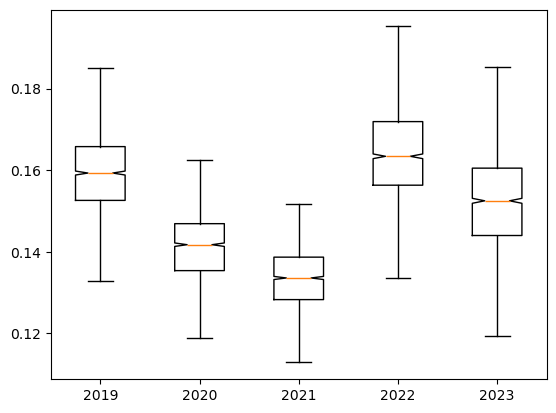

In [238]:
x = [] # band data 
y = [] # year

for raster, nomen in zip(stacked_clips, names): 
    filtered = raster[11, :, :].reshape(raster.shape[1] * raster.shape[2])
    x.append(filtered[filtered > 0])
    y.append(int(nomen))
plt.boxplot(x, y, labels = names, showfliers=False)

### Plotting RGB
Useful for having a global overview of the area

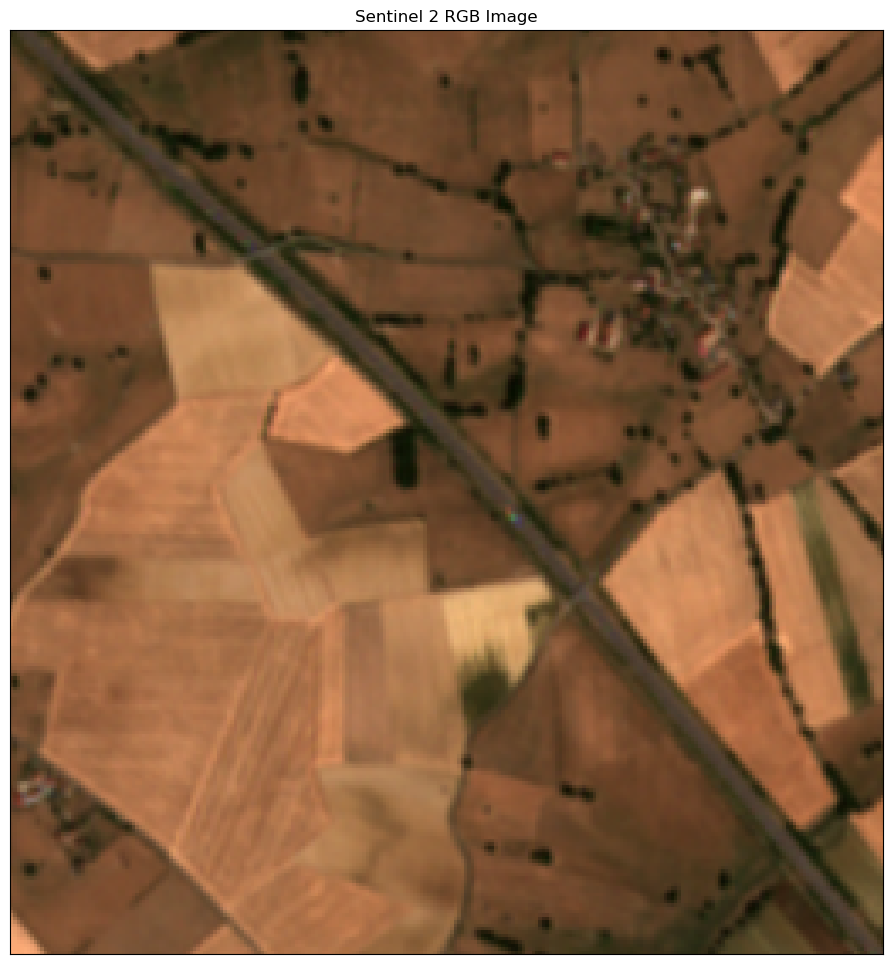

In [18]:
fig, ax = plt.subplots(figsize=(12, 12))

# Plot red, green, and blue bands, respectively
ep.plot_rgb(image_1, rgb=(3, 2, 1), ax=ax, title="Sentinel 2 RGB Image")
plt.show()

### Plotting all the bands

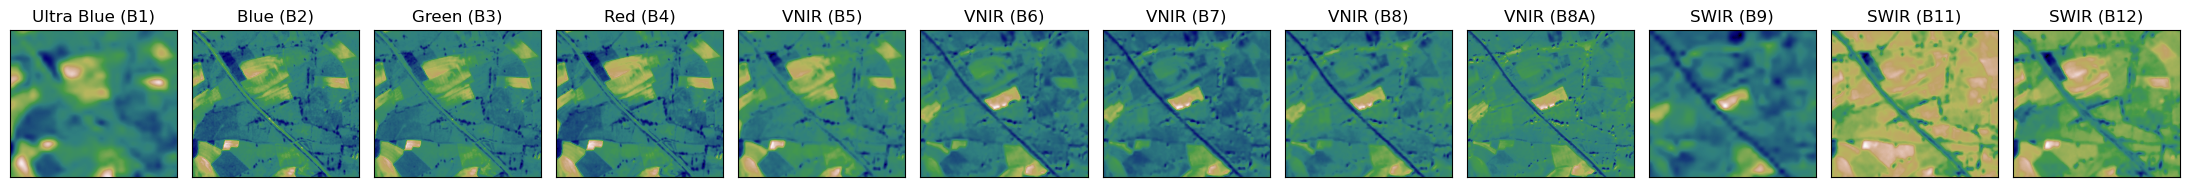

In [18]:
# Here we are plotting all then bands
myplots = [image_1]
# defining titles for plot
titles = ["Ultra Blue (B1)", "Blue (B2)", "Green (B3)", "Red (B4)", "VNIR (B5)", 
          "VNIR (B6)", "VNIR (B7)", "VNIR (B8)",
         "VNIR (B8A)", "SWIR (B9)", "SWIR (B11)", "SWIR (B12)"]
for plot in  myplots:
    image = ep.plot_bands(
        arr = plot, 
        cmap = 'gist_earth',
        figsize = (22, 10), 
        cols = 12,
        cbar = False,
        title = titles
    )

### Spectral analysis
Here we are doing a spectral profile:
> A spectral profile refers to the distribution or characterization of an object's or material's intensity or properties across different wavelengths or spectral bands within the electromagnetic spectrum. It represents how the intensity or response of a particular object or substance varies across various wavelengths. 

(12, 248, 282)


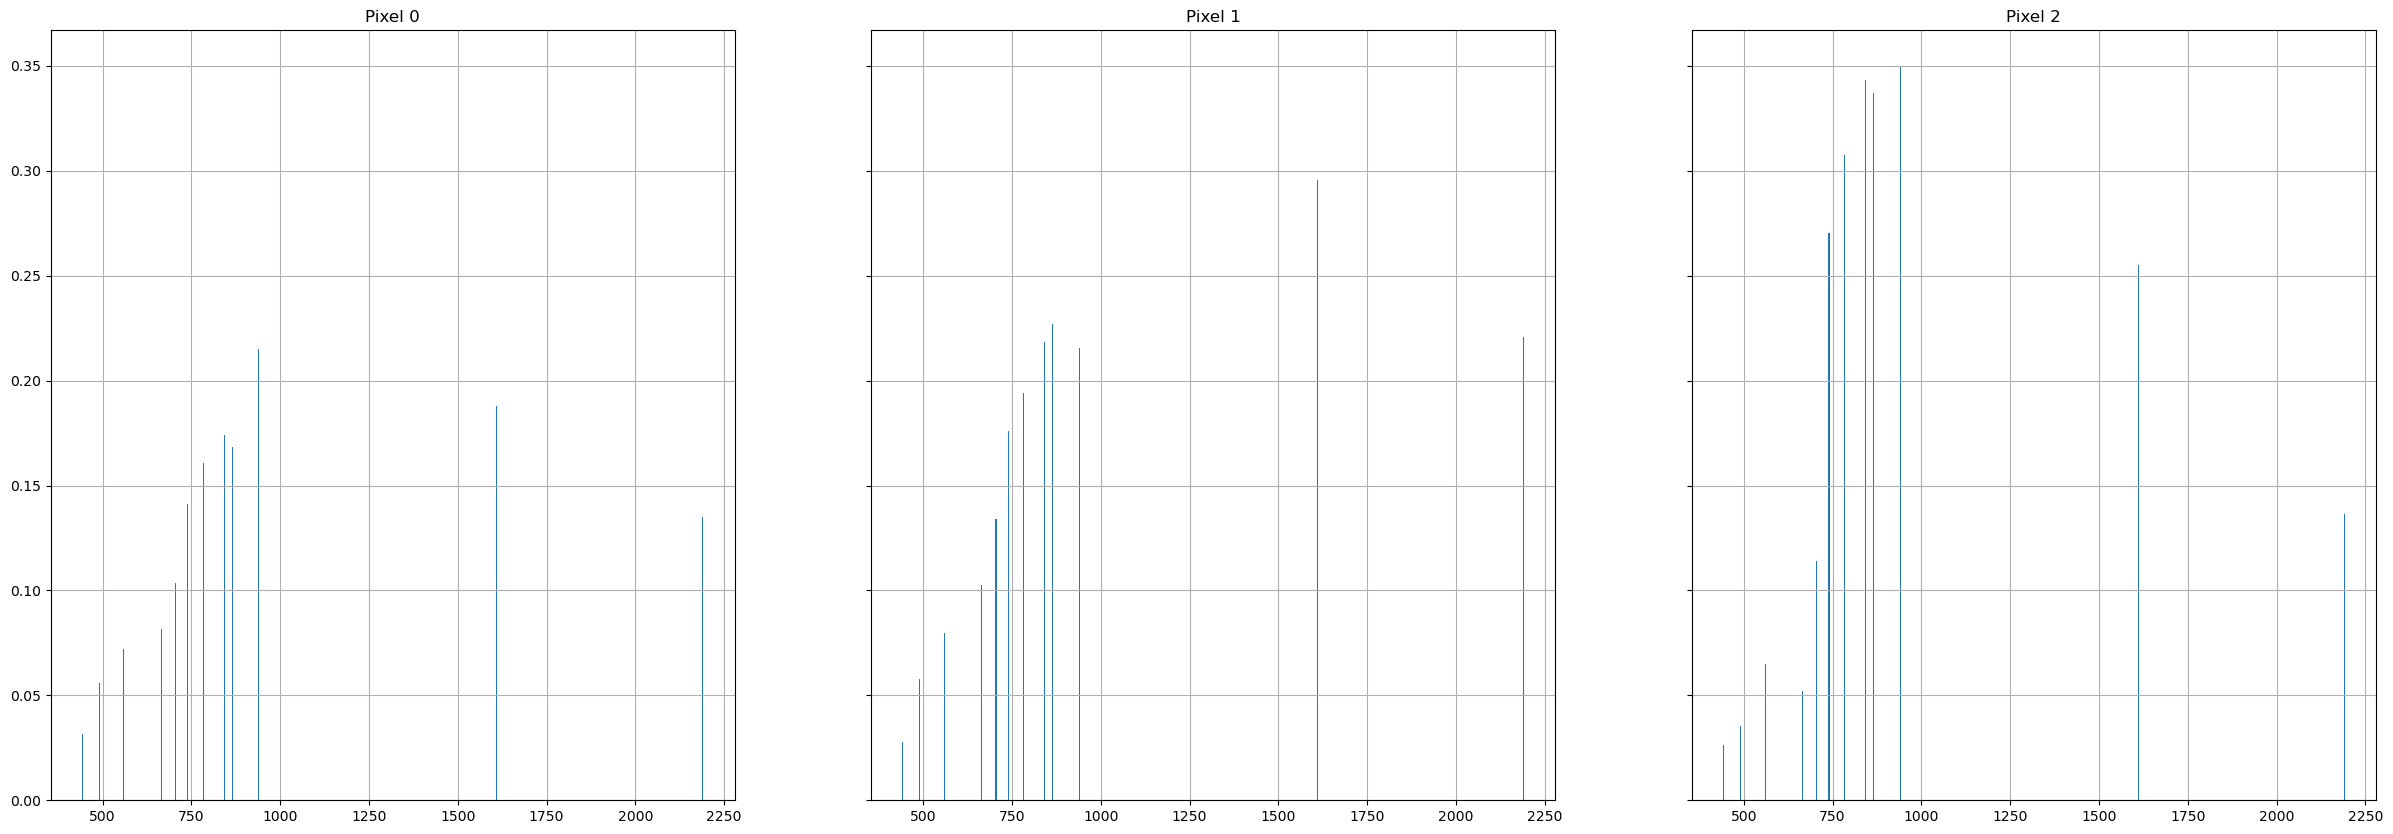

In [52]:
print(image_1.shape)
pixels = [image_1[:, 1, 1], image_1[:, 20, 150], image_1[:, 150, 20]]
fig, axs = plt.subplots(ncols = len(pixels), sharey=True, figsize=(30, 10))
wavelengths = [443, 490, 560, 665, 705, 740, 783, 842, 865, 940, 1610, 2190]

for num, pixel in enumerate(pixels): 
    axs[num].bar(wavelengths, pixel, 3)
    axs[num].set_title("Pixel {}".format(num))
    axs[num].grid(True)

# setting titles
